In [29]:
!pip install matplotlib
!pip install seaborn

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing data set using Pandas
import pandas as pd
csv_path = r"C:\Users\sansk\Downloads\Bank_Personal_Loan_Modelling(1).csv"

df = pd.read_csv(csv_path)
print(df.head(5))

   ID  Age  Experience  Income  ZIP Code  Family CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4  1/60          1         0   
1   2   45          19      34     90089       3  1/50          1         0   
2   3   39          15      11     94720       1  1/00          1         0   
3   4   35           9     100     94112       1  2/70          2         0   
4   5   35           8      45     91330       4  1/00          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  


In [3]:
df.head(5)


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1


In [4]:
# We can see that the dimension of the dataframe
# We have 5000 sample data from a Bank. Containing 14 column (Variables)
df.shape


(5000, 14)

In [5]:
'''About this file
ID: customer Id (continuous variable)

Age:customer's age in completed years (Categorical Variable)

Experience:years of professional experience (Catagorical)

Income:Annual income of the customer in thousands (Continious)

ZIP Code:Address Zip code (Continuous)

Family:family size of customer (Catagorical)

CCAvg:Avg. spending on credit card per month
due to all other parameter is annually so i converted it for per year

Education :Educational level ( undergraduate= 1 , graduate=2 , advance=3)

Education :Educational level ( undergraduate= 1 , graduate=2 , advance=3)

Personal Loan: Did this customer accept the personal loan offered in the last campaign?

Securities Account:Does the customer have a securities account with the bank?

CD Account:Does the customer have a certificate of deposit(CD) account with the bank?

Online:Does the customer use internet banking facilities

CreditCard: Does the customer use a credit card issued by universalBank?'''

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5000 non-null   int64 
 1   Age                 5000 non-null   int64 
 2   Experience          5000 non-null   int64 
 3   Income              5000 non-null   int64 
 4   ZIP Code            5000 non-null   int64 
 5   Family              5000 non-null   int64 
 6   CCAvg               5000 non-null   object
 7   Education           5000 non-null   int64 
 8   Mortgage            5000 non-null   int64 
 9   Personal Loan       5000 non-null   int64 
 10  Securities Account  5000 non-null   int64 
 11  CD Account          5000 non-null   int64 
 12  Online              5000 non-null   int64 
 13  CreditCard          5000 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 547.0+ KB


In [6]:
#Since the data column "CCAvg" is in the form of object, we can see that this is a catagorical variable
df['CCAvg'].describe()

count     5000
unique     108
top       0/30
freq       241
Name: CCAvg, dtype: object

In [7]:
#Check the statistical dimentions of the data set
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [8]:
miss_data = df.isnull()

In [9]:
miss_data.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
# Checking for any missing values
for column in miss_data.columns.values.tolist():
    print(column)
    print(miss_data[column].value_counts())
    print(" ")

ID
ID
False    5000
Name: count, dtype: int64
 
Age
Age
False    5000
Name: count, dtype: int64
 
Experience
Experience
False    5000
Name: count, dtype: int64
 
Income
Income
False    5000
Name: count, dtype: int64
 
ZIP Code
ZIP Code
False    5000
Name: count, dtype: int64
 
Family
Family
False    5000
Name: count, dtype: int64
 
CCAvg
CCAvg
False    5000
Name: count, dtype: int64
 
Education
Education
False    5000
Name: count, dtype: int64
 
Mortgage
Mortgage
False    5000
Name: count, dtype: int64
 
Personal Loan
Personal Loan
False    5000
Name: count, dtype: int64
 
Securities Account
Securities Account
False    5000
Name: count, dtype: int64
 
CD Account
CD Account
False    5000
Name: count, dtype: int64
 
Online
Online
False    5000
Name: count, dtype: int64
 
CreditCard
CreditCard
False    5000
Name: count, dtype: int64
 


In [20]:
def convert_ccavg(x):
    try:
        # Handle missing values (NaN, None)
        if pd.isna(x):
            return None
        
        x = str(x).strip()  # Convert to string and remove whitespace
        
        # Split and convert fractions
        if '/' in x:
            parts = x.split('/')
            if len(parts) == 2:  # Ensure format is "num/den"
                # Check if denominator is zero
                if float(parts[1]) == 0:
                    return float(parts[0])  # Return numerator as float (e.g., "1/0" → 1.0)
                else:
                    num, den = float(parts[0]), float(parts[1])
                    return num / den  # Normal division
            else:
                return None  # Invalid format like "1/2/3"
        else:
            return float(x)  # Direct conversion for non-fractions
    except (ValueError, TypeError):
        return None  # Handle invalid strings (e.g., "N/A", "High")

# Apply the function
df['CCAvg_float'] = df['CCAvg'].apply(convert_ccavg)

# Check results
print(df[['CCAvg', 'CCAvg_float']].head())

  CCAvg  CCAvg_float
0  1/60     0.016667
1  1/50     0.020000
2  1/00     1.000000
3  2/70     0.028571
4  1/00     1.000000


In [21]:
df['CCAvg_float'].describe()

count    5000.000000
mean        0.315289
std         0.982846
min         0.000000
25%         0.000000
50%         0.025000
75%         0.100000
max        10.000000
Name: CCAvg_float, dtype: float64

In [22]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   object 
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
 14  CCAvg_float         5000 non-null   float64
dtypes: float64(1), int64(13), object(1)
memory usage: 586.1

In [43]:
#Excluding the 'CCAvg' column
df2 = df.drop(columns=['CCAvg'])


In [44]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
 13  CCAvg_float         5000 non-null   float64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [45]:
# Including only necessary potential predictors 
df2= df2.drop(columns = ['ID','ZIP Code'])

In [52]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Experience          5000 non-null   int64   
 1   Income              5000 non-null   int64   
 2   Family              5000 non-null   int64   
 3   Education           5000 non-null   int64   
 4   Mortgage            5000 non-null   int64   
 5   Personal Loan       5000 non-null   int64   
 6   Securities Account  5000 non-null   int64   
 7   CD Account          5000 non-null   int64   
 8   Online              5000 non-null   int64   
 9   CreditCard          5000 non-null   int64   
 10  CCAvg_float         5000 non-null   float64 
 11  Age_Group           5000 non-null   category
dtypes: category(1), float64(1), int64(10)
memory usage: 435.0 KB


In [ ]:
#Change Age into a categorical variable

# Define the bins and labels
bins = [0, 10, 20, 30, 40, 50, 60, 70] 
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70']

# Create the age groups
df2['Age_Group'] = pd.cut(df2['Age'], bins=bins, labels=labels, right=True)

# Verify
df2= df2.drop(columns = ['Age'])
print(df2[['Age_Group']].head())

In [53]:
#Change Family into a categorical variable

# Convert to categorical with string labels
df2['Family'] = df2['Family'].astype('category')

# Verify
print(df2['Family'].dtype)  # Should show 'category'
print(df2['Family'].cat.categories)  # Shows [1, 2, 3, 4]

category
Index([1, 2, 3, 4], dtype='int64')


In [58]:
df2.describe()

,Experience,Income,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,CCAvg_float
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,20.104600,73.774200,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000,0.315289
std,11.467954,46.033729,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637,0.982846
min,-3.000000,8.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,10.000000,39.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,20.000000,64.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.025000
75%,30.000000,98.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000,0.100000
max,43.000000,224.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000,10.000000


In [55]:
df2.rename(columns={"Income":"Income in thousand", "Morgage":"Morgage in thousands"})

,Experience,Income in thousand,Family,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,CCAvg_float,Age_Group
0,1,49,4,1,0,0,1,0,0,0,0.016667,20-30
1,19,34,3,1,0,0,1,0,0,0,0.020000,40-50
2,15,11,1,1,0,0,0,0,0,0,1.000000,30-40
3,9,100,1,2,0,0,0,0,0,0,0.028571,30-40
4,8,45,4,2,0,0,0,0,0,1,1.000000,30-40
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3,40,1,3,0,0,0,0,1,0,0.011111,20-30
4996,4,15,4,1,85,0,0,0,1,0,0.000000,20-30
4997,39,24,2,3,0,0,0,0,0,0,0.000000,60-70
4998,40,49,3,2,0,0,0,0,1,0,0.000000,60-70


In [56]:
#Change Education into a categorical variable

# Convert to categorical with string labels
df2['Education'] = df2['Education'].astype('category')

# Verify
print(df2['Education'].dtype)  # Should show 'category'
print(df2['Education'].cat.categories)  

# Educational level ( undergraduate= 1 , graduate=2 , advance=3)

category
Index([1, 2, 3], dtype='int64')


In [59]:
#Change Personal loan into a categorical variable

# Convert to categorical with string labels
df2['Personal Loan'] = df2['Personal Loan'].astype('category')

# Verify
print(df2['Personal Loan'].dtype)  # Should show 'category'
print(df2['Personal Loan'].cat.categories)  

# 0 = No; 1 = Yes

category
Index([0, 1], dtype='int64')


In [60]:
#Change Securities Account into a categorical variable

# Convert to categorical with string labels
df2['Securities Account'] = df2['Securities Account'].astype('category')

# Verify
print(df2['Securities Account'].dtype)  # Should show 'category'
print(df2['Securities Account'].cat.categories)  

# 0 = No; 1 = Yes

category
Index([0, 1], dtype='int64')


In [61]:
#Change CD Account into a categorical variable

# Convert to categorical with string labels
df2['CD Account'] = df2['CD Account'].astype('category')

# Verify
print(df2['CD Account'].dtype)  # Should show 'category'
print(df2['CD Account'].cat.categories)  

# 0 = No; 1 = Yes

category
Index([0, 1], dtype='int64')


In [62]:
#Change Online into a categorical variable

# Convert to categorical with string labels
df2['Online'] = df2['Online'].astype('category')

# Verify
print(df2['Online'].dtype)  # Should show 'category'
print(df2['Online'].cat.categories)  

# 0 = No; 1 = Yes

category
Index([0, 1], dtype='int64')


In [63]:
#Change CreditCard into a categorical variable

# Convert to categorical with string labels
df2['CreditCard'] = df2['CreditCard'].astype('category')

# Verify
print(df2['CreditCard'].dtype)  # Should show 'category'
print(df2['CreditCard'].cat.categories)  

# 0 = No; 1 = Yes

category
Index([0, 1], dtype='int64')


In [66]:
df2.describe(include= 'all')

,Experience,Income,Family,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,CCAvg_float,Age_Group
count,5000.000000,5000.000000,5000.0,5000.0,5000.000000,5000.0,5000.0,5000.0,5000.0,5000.0,5000.000000,5000
unique,NaN,NaN,4.0,3.0,NaN,2.0,2.0,2.0,2.0,2.0,NaN,5
top,NaN,NaN,1.0,1.0,NaN,0.0,0.0,0.0,1.0,0.0,NaN,50-60
freq,NaN,NaN,1472.0,2096.0,NaN,4520.0,4478.0,4698.0,2984.0,3530.0,NaN,1323
mean,20.104600,73.774200,NaN,NaN,56.498800,NaN,NaN,NaN,NaN,NaN,0.315289,NaN
std,11.467954,46.033729,NaN,NaN,101.713802,NaN,NaN,NaN,NaN,NaN,0.982846,NaN
min,-3.000000,8.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
25%,10.000000,39.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
50%,20.000000,64.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,0.025000,NaN
75%,30.000000,98.000000,NaN,NaN,101.000000,NaN,NaN,NaN,NaN,NaN,0.100000,NaN


In [67]:
df2.describe()

,Experience,Income,Mortgage,CCAvg_float
count,5000.000000,5000.000000,5000.000000,5000.000000
mean,20.104600,73.774200,56.498800,0.315289
std,11.467954,46.033729,101.713802,0.982846
min,-3.000000,8.000000,0.000000,0.000000
25%,10.000000,39.000000,0.000000,0.000000
50%,20.000000,64.000000,0.000000,0.025000
75%,30.000000,98.000000,101.000000,0.100000
max,43.000000,224.000000,635.000000,10.000000


In [68]:
cat_cols=df2.select_dtypes(include=['category']).columns
num_cols = df2.select_dtypes(include=np.number).columns.tolist()

Experience
Skew : -0.03


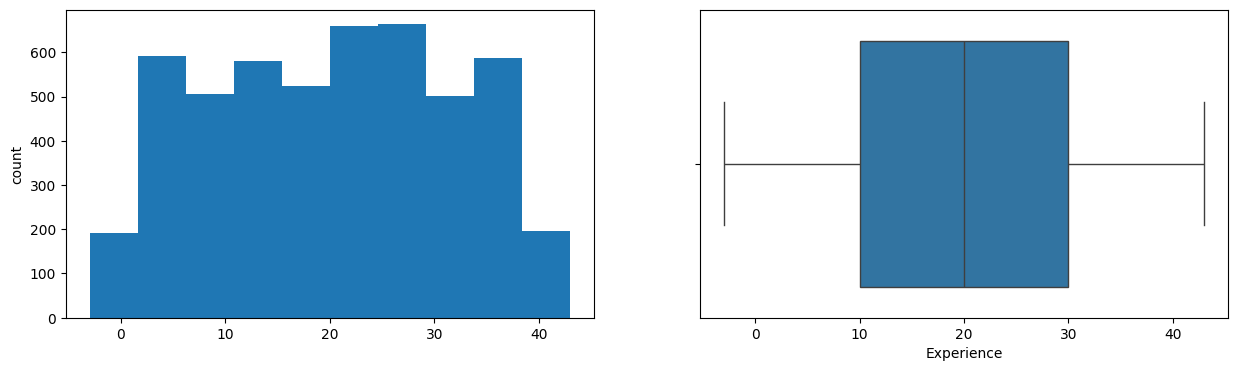

Income
Skew : 0.84


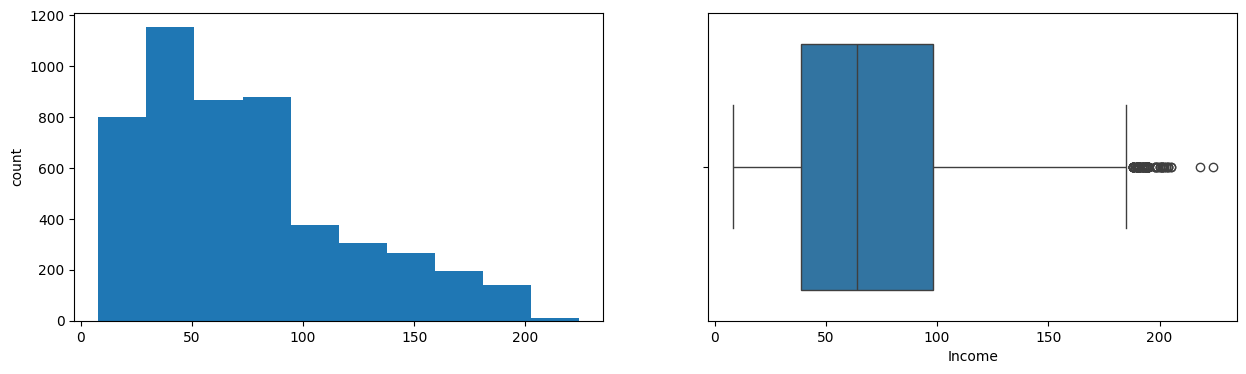

Mortgage
Skew : 2.1


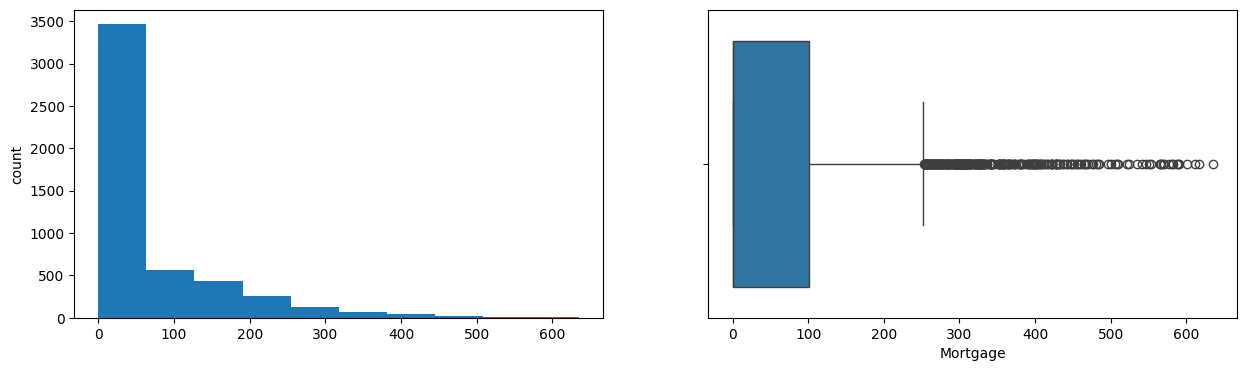

CCAvg_float
Skew : 5.02


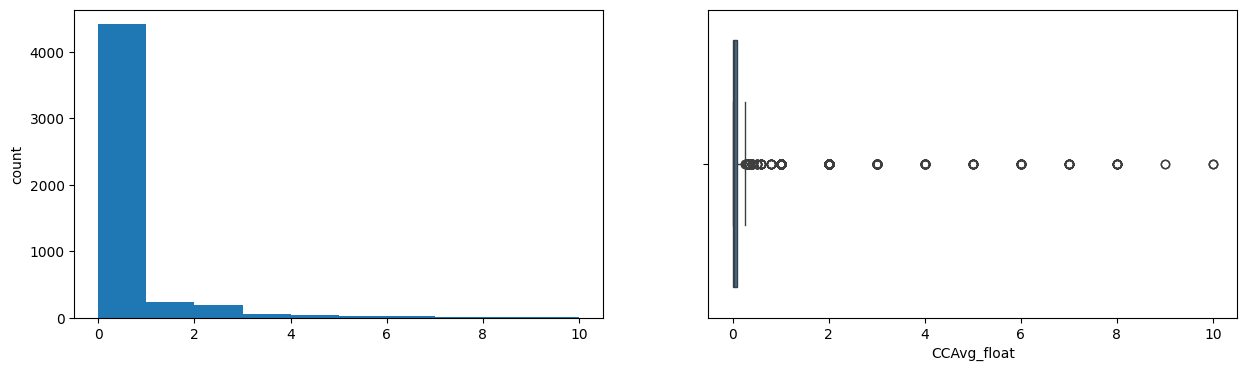

In [70]:
for col in num_cols:
    print(col)
    print('Skew :', round(df2[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df2[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df2[col])
    plt.show()